In [1]:
#importing usefull libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\USER\\Desktop\\electric cars\\Cheapestelectriccars-EVDatabase 2023.csv")
df.head()
# Empty cells can be seen in the dataframe

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             309 non-null    object
 1   Subtitle         309 non-null    object
 2   Acceleration     309 non-null    object
 3   TopSpeed         309 non-null    object
 4   Range            309 non-null    object
 5   Efficiency       309 non-null    object
 6   FastChargeSpeed  309 non-null    object
 7   Drive            309 non-null    object
 8   NumberofSeats    309 non-null    int64 
 9   PriceinGermany   282 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.7+ KB


In [4]:
#looking for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
304    False
305    False
306    False
307    False
308    False
Length: 309, dtype: bool

In [5]:
#creating new column called manufacturers from the name column
df['Manufacturer']=df.Name.str.split(' ', 1, expand=True)[0]
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10372\2807643102.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Manufacturer']=df.Name.str.split(' ', 1, expand=True)[0]


,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN,Lucid
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400",Porsche
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000",Audi
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN,Renault
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN,Audi


In [6]:
#filling all the empty spaces with zero
df=df.fillna('0')
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",0,Lucid
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400",Porsche
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000",Audi
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",0,Renault
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,0,0,Audi


In [7]:
#removing currency sign from priceinUK and priceinGermany
Price1=[]
for x in df['PriceinUK']:
    Price1+=[int(x.replace('£','').replace(',',''))]
df['PriceinUK']=Price1
Price2=[]
for x in df['PriceinGermany']:
    Price2+=[int(x.replace('€','').replace(',',''))]
df['PriceinGermany']=Price2
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,218000,0,Lucid
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,189668,142400,Porsche
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,146050,115000,Audi
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,36840,0,Renault
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,0,0,Audi


In [8]:
#cleaning the charge speed and efficiency columns and setting their values to int
chargespeed=[]
for x in df['FastChargeSpeed']:
    chargespeed+=[int(x.replace(' km/h','').replace('-','0'))]
df['FastChargeSpeed']=chargespeed

efficiency=[]
for x in df['Efficiency']:
   efficiency+=[int(x.replace(' Wh/km','').replace('-','0'))]
df['Efficiency']=efficiency
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183,820,All Wheel Drive,5,218000,0,Lucid
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209,980,All Wheel Drive,4,189668,142400,Porsche
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210,1000,All Wheel Drive,4,146050,115000,Audi
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165,230,Front Wheel Drive,5,36840,0,Renault
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182,360,Rear Wheel Drive,5,0,0,Audi


In [9]:
#cleaning the range and top speed and setting their values to int
Range=[]
for x in df['Range']:
   Range+=[int(x.replace(' km',''))]
df['Range']=Range

Topspeed=[]
for x in df['TopSpeed']:
   Topspeed+=[int(x.replace(' km/h',''))]
df['TopSpeed']=Topspeed
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270,645,183,820,All Wheel Drive,5,218000,0,Lucid
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260,400,209,980,All Wheel Drive,4,189668,142400,Porsche
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250,405,210,1000,All Wheel Drive,4,146050,115000,Audi
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135,315,165,230,Front Wheel Drive,5,36840,0,Renault
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160,285,182,360,Rear Wheel Drive,5,0,0,Audi


In [10]:
#cleaning the acceleration and subtitle and setting their values to int
acceleration=[]
for x in df['Acceleration']:
   acceleration+=[float(x.replace(' sec',''))]
df['Acceleration']=acceleration
df

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7,270,645,183,820,All Wheel Drive,5,218000,0,Lucid
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8,260,400,209,980,All Wheel Drive,4,189668,142400,Porsche
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3,250,405,210,1000,All Wheel Drive,4,146050,115000,Audi
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4,135,315,165,230,Front Wheel Drive,5,36840,0,Renault
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0,160,285,182,360,Rear Wheel Drive,5,0,0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0,180,470,164,700,Rear Wheel Drive,5,55000,53000,Volkswagen
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0,180,520,165,800,Rear Wheel Drive,5,60000,56000,Volkswagen
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4,180,510,184,760,Rear Wheel Drive,5,60000,55000,Polestar
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8,200,475,198,710,All Wheel Drive,5,65000,60000,Polestar


In [11]:
df['KWH']=df.Subtitle.str.split(' ', 1, expand=True)[0]
df['KWH']=df['KWH'].astype(float)

C:\Users\USER\AppData\Local\Temp\ipykernel_10372\205749893.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['KWH']=df.Subtitle.str.split(' ', 1, expand=True)[0]


# VISUALIZATIONS

C:\Users\USER\AppData\Local\Temp\ipykernel_10372\1390244976.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


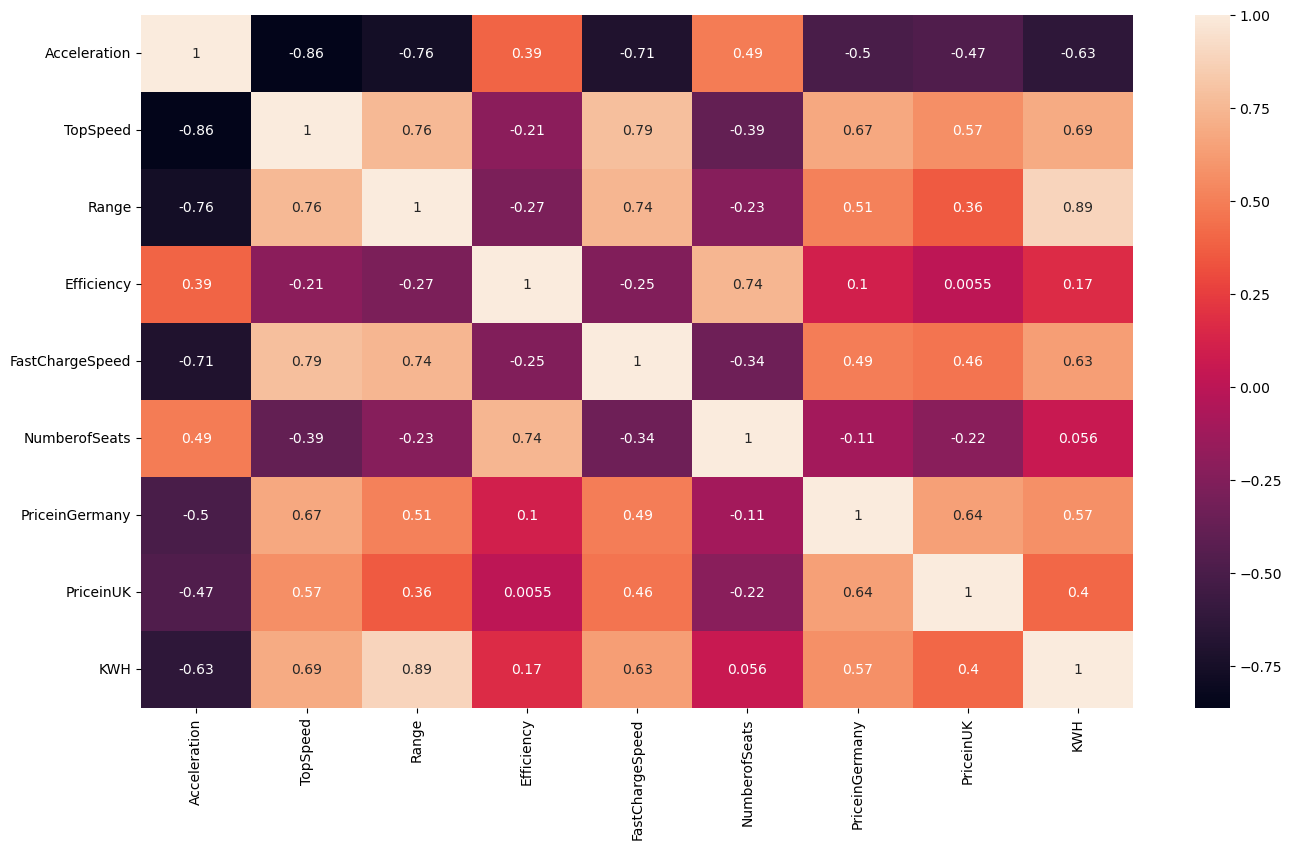

In [12]:
#gettting the correlation between various columns
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True)
plt.show()

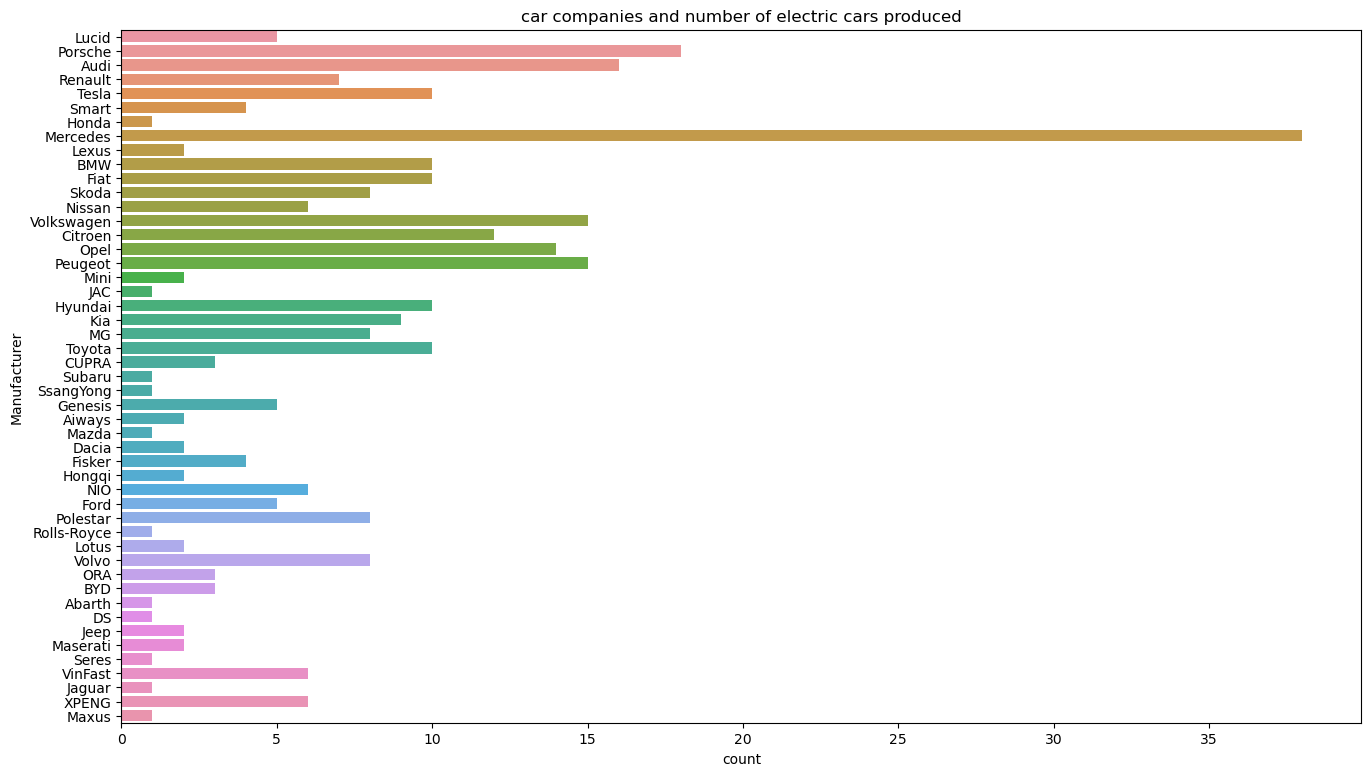

In [13]:
#various car manufacturers and number of cars made by them
plt.figure(figsize=(16,9))
sns.countplot(y='Manufacturer', data=df)
plt.title('car companies and number of electric cars produced')
plt.show()

[]

<Figure size 1600x900 with 0 Axes>

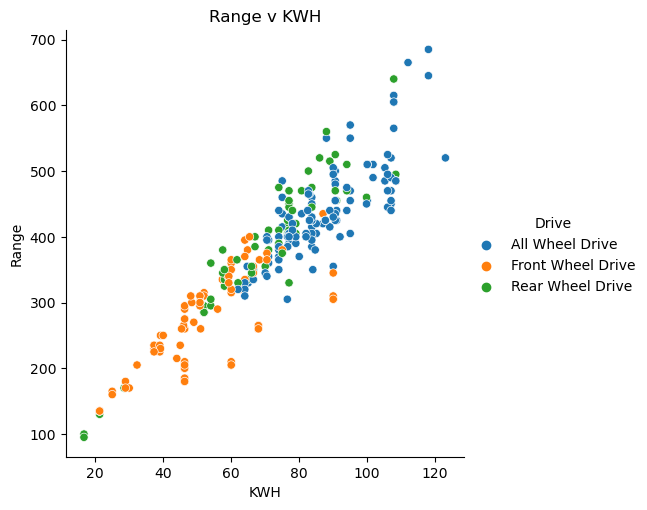

In [14]:
#looking at how battery capacity and drive type affects range
plt.figure(figsize=(16,9))
#fig, ax=plt.subplots()
sns.relplot(x='KWH',y='Range',hue='Drive',data=df)
#ax.set_xlim(50,250)
plt.title('Range v KWH')
plt.plot()

<Figure size 1600x900 with 0 Axes>

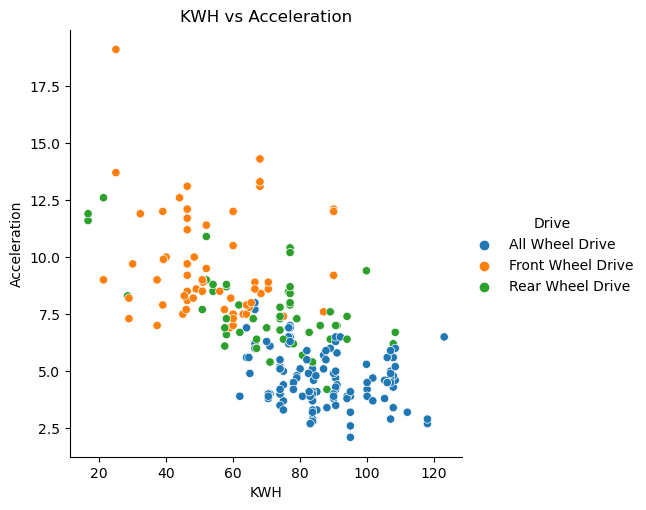

In [15]:
plt.figure(figsize=(16,9))
sns.relplot(x='KWH',y='Acceleration',hue='Drive',data=df)
plt.title('KWH vs Acceleration')
plt.ylabel('Acceleration')
plt.show()

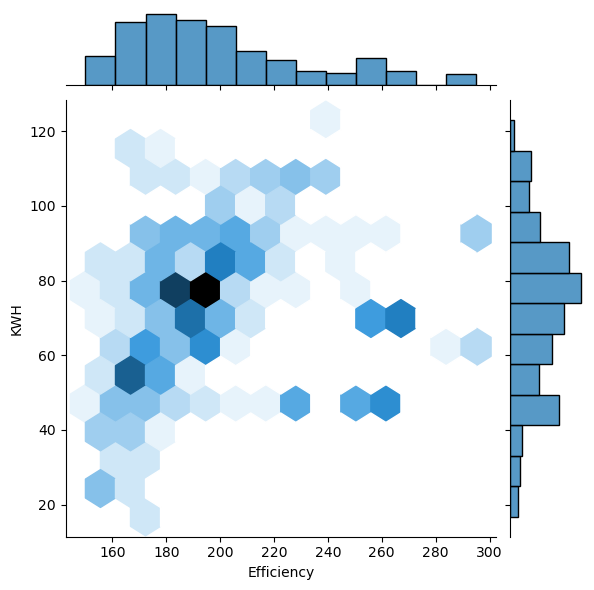

In [16]:
sns.jointplot(y='KWH',x='Efficiency',data=df,kind='hex')
plt.show()

<Figure size 1600x900 with 0 Axes>

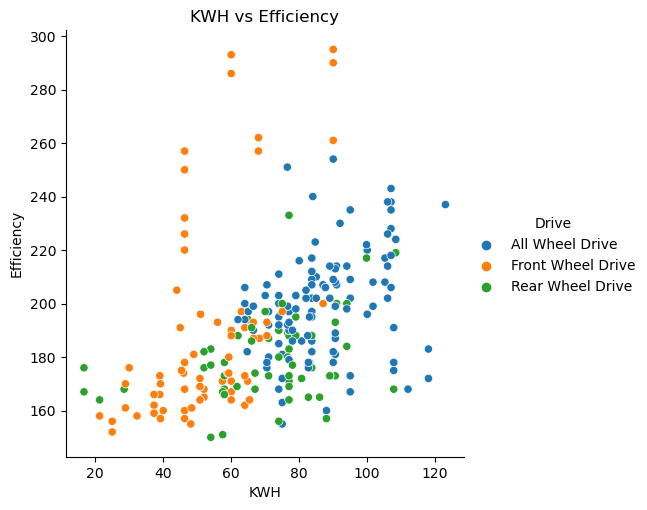

In [17]:
plt.figure(figsize=(16,9))
sns.relplot(x='KWH',y='Efficiency',hue='Drive',data=df)
plt.title('KWH vs Efficiency')
plt.ylabel('Efficiency')
plt.show()

<Figure size 1600x900 with 0 Axes>

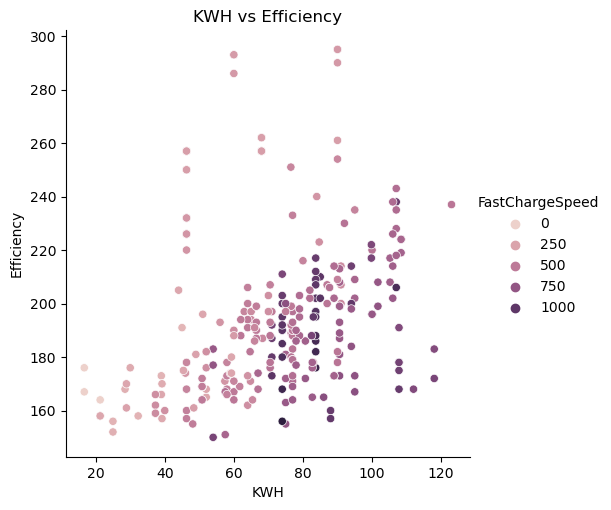

In [18]:
plt.figure(figsize=(16,9))
sns.relplot(x='KWH',y='Efficiency',hue='FastChargeSpeed',data=df)
plt.title('KWH vs Efficiency')
plt.ylabel('Efficiency')
plt.show()

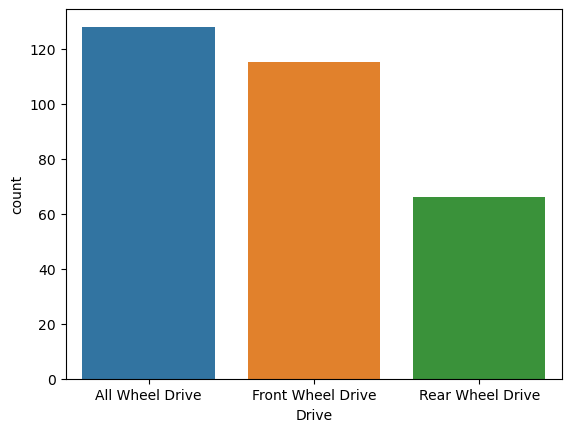

In [19]:
sns.countplot(x='Drive', data=df)
plt.show()

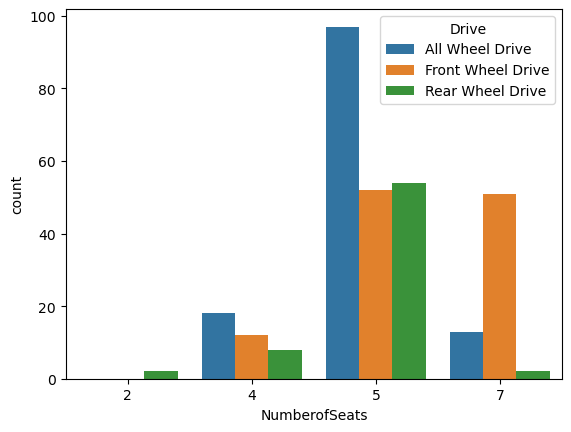

In [20]:
sns.countplot(x='NumberofSeats',hue='Drive', data=df)
plt.show()

# MACHINE LEARNING

In [21]:
#filling in empty values1 in pound columnc
x=0
for i in range(0, len(df['PriceinUK'])):
                       if (df['PriceinUK'][i]==0):
                        x+=1
print('Empty values: ',x)

Empty values:  111


In [22]:
#converting german price to uk price
pd.options.mode.chained_assignment=None
for i in range(0, len(df['PriceinUK'])):
                       if (df['PriceinUK'][i]==0):
                         val=df['PriceinGermany'][i]*0.85
                         df['PriceinUK'][i]=val
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer,KWH
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7,270,645,183,820,All Wheel Drive,5,218000,185300.0,Lucid,118.0
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8,260,400,209,980,All Wheel Drive,4,189668,142400.0,Porsche,83.7
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3,250,405,210,1000,All Wheel Drive,4,146050,115000.0,Audi,85.0
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4,135,315,165,230,Front Wheel Drive,5,36840,31314.0,Renault,52.0
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0,160,285,182,360,Rear Wheel Drive,5,0,0.0,Audi,52.0


In [23]:
#converting uk price to german price
pd.options.mode.chained_assignment=None
for i in range(0, len(df['PriceinGermany'])):
                       if (df['PriceinGermany'][i]==0):
                         val=df['PriceinUK'][i]*1.17
                         df['PriceinGermany'][i]=val
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer,KWH
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7,270,645,183,820,All Wheel Drive,5,218000.0,185300.0,Lucid,118.0
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8,260,400,209,980,All Wheel Drive,4,189668.0,142400.0,Porsche,83.7
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3,250,405,210,1000,All Wheel Drive,4,146050.0,115000.0,Audi,85.0
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4,135,315,165,230,Front Wheel Drive,5,36840.0,31314.0,Renault,52.0
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0,160,285,182,360,Rear Wheel Drive,5,0.0,0.0,Audi,52.0


In [24]:
#labeling data
!pip install category_encoders

In [25]:
#Mapp numercal data to drive type
a={'Front Wheel Drive':1, 'Rear Wheel Drive':2, 'All Wheel Drive':3}
df['Drive']=df['Drive'].map(a)
df

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,Manufacturer,KWH
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7,270,645,183,820,3,5,218000.0,185300.0,Lucid,118.0
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8,260,400,209,980,3,4,189668.0,142400.0,Porsche,83.7
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3,250,405,210,1000,3,4,146050.0,115000.0,Audi,85.0
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4,135,315,165,230,1,5,36840.0,31314.0,Renault,52.0
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0,160,285,182,360,2,5,0.0,0.0,Audi,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0,180,470,164,700,2,5,55000.0,53000.0,Volkswagen,77.0
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0,180,520,165,800,2,5,60000.0,56000.0,Volkswagen,86.0
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4,180,510,184,760,2,5,60000.0,55000.0,Polestar,94.0
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8,200,475,198,710,3,5,65000.0,60000.0,Polestar,94.0


In [26]:
#collecting feature data and  y variable
y=df['PriceinUK'].values
X =df[['Drive','Range', 'Efficiency', 'FastChargeSpeed', 'NumberofSeats', 'KWH', 'TopSpeed', 'Acceleration']]
X.head()

,Drive,Range,Efficiency,FastChargeSpeed,NumberofSeats,KWH,TopSpeed,Acceleration
0,3,645,183,820,5,118.0,270,2.7
1,3,400,209,980,4,83.7,260,2.8
2,3,405,210,1000,4,85.0,250,3.3
3,1,315,165,230,5,52.0,135,11.4
4,2,285,182,360,5,52.0,160,9.0


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X_train

,Drive,Range,Efficiency,FastChargeSpeed,NumberofSeats,KWH,TopSpeed,Acceleration
227,3,470,228,610,5,107.0,210,4.7
63,3,385,217,950,4,83.7,250,2.9
11,2,170,168,180,4,28.5,145,8.3
286,3,410,190,630,5,78.0,205,4.2
164,3,485,187,720,5,90.6,210,4.2
...,...,...,...,...,...,...,...,...
155,2,445,173,560,5,77.0,160,8.7
285,3,420,186,650,5,78.0,205,4.5
96,3,565,191,840,5,107.8,250,3.4
248,1,260,175,240,5,45.4,160,8.3


In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
y_test

array([ 41975.  ,      0.  ,  53000.  ,  99785.  ,  58225.  ,  36995.  ,
        32845.  ,      0.  ,  31130.  ,  60690.  ,  65405.  ,  44149.  ,
        32130.  ,  44667.5 ,  37520.  ,  37750.  ,  57847.6 , 139170.  ,
        34300.  ,  43341.5 ,  48441.5 ,  60880.  ,  28995.  ,  46035.  ,
            0.  ,  46282.5 ,  43150.  ,  91406.  ,  32450.  ,  21420.  ,
        55310.  ,  53541.5 ,  33405.  ,  30050.  ,  70300.  ,  58606.65,
        36000.  ,  60184.25, 143400.  ,  36000.  ,  30166.5 ,  48355.  ,
        69615.  ,  46745.  ,  54275.  ,  47591.5 ,  49995.  ,  53905.  ,
        75846.  , 119225.  ,  25995.  ,  30166.5 ,  46650.  ,      0.  ,
        40417.5 , 108000.  ,      0.  , 100555.  ,  52185.  ,  52691.5 ,
       120900.  ,  53010.  ])

In [29]:
y_pred

array([ 46132.392     ,  33793.11572222,  37657.70166667,  74360.64      ,
        64501.14516667,  37857.23366667,  26907.12263889,  33309.31738889,
        32645.53838095,  58272.95196667,  62236.36738889,  47169.58992063,
        32978.57027778,  46417.60295833,  33943.82314995,  37712.73666667,
        38386.30329167, 107974.87233333,  33559.6735    ,  56542.17333333,
        33943.82314995,  57929.3       ,  30072.12255556,  46343.11516667,
        33943.82314995,  45301.09      ,  33727.47616667,  92296.733     ,
        29310.27194444,  14355.65861111,  47350.87281389,  52270.64565167,
        29920.86703571,  25521.16009259,  58394.149     ,  38386.30329167,
        32092.87202778,  25396.55      , 139060.15      ,  36979.68721429,
        32230.38330556,  42683.01233333,  47905.43333333,  40790.62      ,
        41710.96143579,  42851.72890873,  48621.29538889,  44437.434     ,
        70537.37455238, 150262.579     ,  32651.16116667,  15855.82891667,
        44652.056     ,  

In [36]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred) )

Mean Absolute Error:  10131.155661578665


In [37]:
#mean squared error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred) )

Mean Squared Error:  227055018.63198158


In [38]:
#Root mean squared error
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error:  15068.344920129137


In [40]:
# R2
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred) 
print('R2:  ',r2 )

R2:   0.7548541074071758
